## Tarea 2

# a)
1) Consideren la función
$$
z_{n+1} = z_n^2 + c, 
$$
con c = -0.123 + 0.745im. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).
¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?
Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

In [1]:
using PyPlot

In [2]:
function funcion(n::Int64,z0)
c= complex(-0.123,0.745)
    for i in 1:n
        z0= z0^2 + c
    end
    return z0 
end 


funcion (generic function with 1 method)

In [3]:
function condiciones_iniciales(real::Array{Float64},imaginario::Array{Float64},inter=[0.0025,0.0025])
    
    dx= collect(real[1]:inter[1]:real[2])
    dy= collect(imaginario[1]:inter[2]:imaginario[2])
    n= length(dx)
    m= length(dy)
    condiciones=zeros(Complex{Float64},n,m)
    for j in 1:m
        for i in 1:n
            condiciones[i,j]= dx[j]+im*dy[m+1-i]
        end
    end 
    return condiciones
end 


condiciones_iniciales (generic function with 2 methods)

In [4]:
function funcionaiterar(f::Function,condiciones::Array{Complex{Float64},2})
    fini=zeros(condiciones)
    for i in 1:length(condiciones)
        fini[i]=f(condiciones[i])
    end
    return fini
end

funcionaiterar (generic function with 1 method)

In [5]:
function iterando(n::Int,real=[-1.0,1.0],imaginario=[-1.0,1.0],inter=[0.0025,0.0025],f = funcion)
     condicionesini=condiciones_iniciales(real,imaginario,inter)
    f(x)= funcion(n,x)
    fn=funcionaiterar(f,condicionesini)
    zn1=zeros(fn)
    for i in 1:length(fn)
        if abs(fn[i].re) < Inf && abs(fn[i].im) < Inf
            zn1[i] = fn[i]
        end
    end
    return zn1
end 
    

iterando (generic function with 5 methods)

Veamos cuántas raíces tiene el polinomio y cuáles son con la función unique, que muestra los valores que se 
repiten en nuestro arreglo

In [6]:
it =iterando(3000);

In [7]:
unique(it)
    

4-element Array{Complex{Float64},1}:
         0.0+0.0im        
   -0.122999+0.745im      
 0.000890582+0.000260601im
   -0.662897+0.561731im   

Por lo tanto:
0 \\
-0.122999+0.745i \\
0.000890582+0.000260601*i \\
-0.662897+0.561731*i
Son los cuatro valores que se repiten.

Son 4 las raíces obtenidas para la función f(x)= x² + c

Ahora, haciendo las gráficas para vender en playeras:

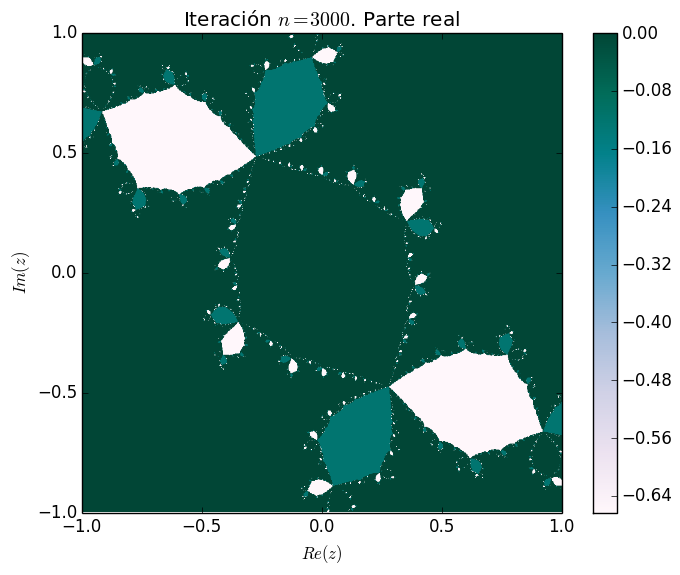

In [8]:
it =iterando(3000);
imshow(real(it),cmap = "PuBuGn", extent =[-1.0, 1.0, -1.0, 1.0])

xlabel(L"Re(z)")
ylabel(L"Im(z)")
title(L"Iteración $n=3000$. Parte real")
colorbar()

show()

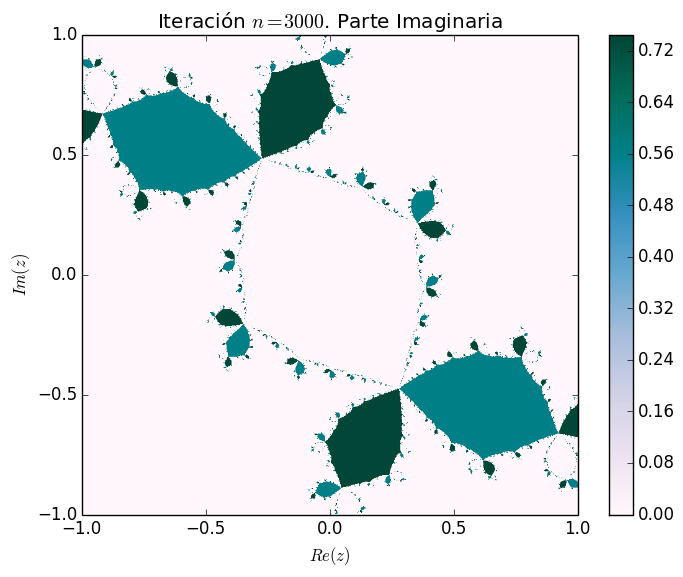

In [9]:
imshow(imag(it),cmap = "PuBuGn", extent =[-1.0, 1.0, -1.0, 1.0],aspect="auto")

xlabel(L"Re(z)")
ylabel(L"Im(z)")
title(L"Iteración $n=3000$. Parte Imaginaria")
colorbar()

show()

# b)

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

Primero encontremos los valores de la función para varias iteraciones:

In [10]:
function B(a,it)  # se hace la función B indicada en el ejercico
    x=0           # se declara una variable local que sirve de apoyo en el ciclo
    y=Float64[a]  # se declara un arreglo del tipo Float64 que guardará los valores del mapeo
    for i in 1:it # se inicia el ciclo con las iteraciones definidas por el usuario
        x=mod(2*a,1) # se calcula el mapeo y se guarda el resultado en la variable de apoyo
        a=x          # se re define la condición inicial
        push!(y,a)   # se guarda en el arreglo y el valor del mapeo
        
    end
                 #se muestra el conjunto de valores del mapeo despues de it iteraciones 
    y
end

B (generic function with 1 method)

In [22]:
c=B(1/3,100)

101-element Array{Float64,1}:
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 ⋮       
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     

Calculemos los puntos fijos con la función compute_roots_

In [12]:

function compute_roots(f, f´)
    initial_conditions = 0:0.125:1
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 1 method)

Implementemos la función antes creada para encontrar los puntos fijos de F(x)=2x, es decir, encontremos los valores tales que F(x)=x, o sea las raíces de la función f(x)=x.

In [13]:
f(x)=x

f (generic function with 1 method)

In [14]:
f_prim(x)=1.0

f_prim (generic function with 1 method)

In [15]:
compute_roots(f,f_prim)

9-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Observamos que el único punto fijo de F es el cero (lo que tiene completo sentido), ahora analicemos su estabilidad.

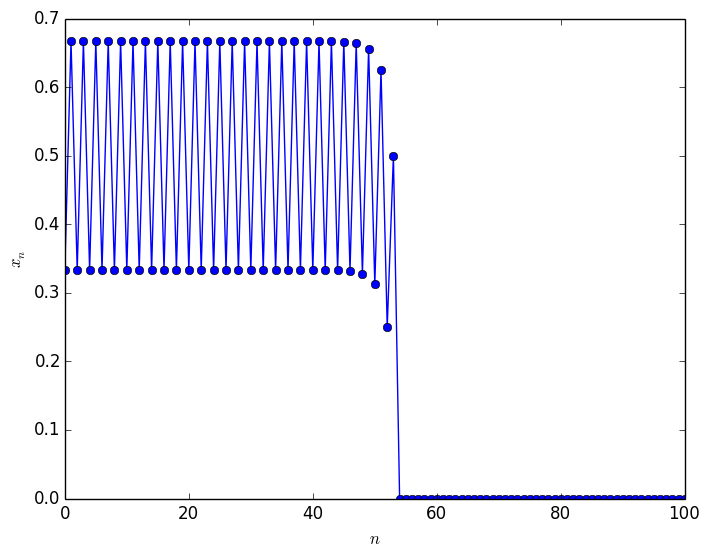

PyObject <matplotlib.text.Text object at 0x3262e2790>

In [23]:
plot(c,"-o")
xlabel(L"n")
ylabel(L"x_n")

In [18]:
c1=B(0.5,100)

101-element Array{Float64,1}:
 0.5
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [19]:
c2=B(1//3,100)

101-element Array{Float64,1}:
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 ⋮       
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333

Se observa que el único punto que el mapeo manda al cero es $1/2$. Sin embargo, si se utilizan flotantes distintos de $1/2$, éstos eventualmente convergen al cero, a pesar de que dicha situación no debería suceder. Se observa también que cuando se utilzan racionales ésto no sucede. Entonces se concluye que el problema está en la "perdida de información" que se sufre al usar flotantes en lugar de racionales; lo que produce que los elemtos de la iteración convergan al $1/2$ y por lo tanto al cero. Entonces los puntos cercanos al cero, a excepción del $1/2$, no convergen ni divergen, por lo que se trata de un punto estable.


Analíticamente se muestra la estabilidad neutral del $0$, por lo que los errores que aparecen numéricamente no se pueden predecir de dicha forma. 